In [91]:
import pandas as pd
import numpy as np
import json
import os
import utils

from pathlib import Path
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set(rc={'figure.figsize':(18, 5)}, font_scale=2)
sns.set_style(style='whitegrid')

# Functions

In [9]:
def get_relevant_wikipages(wikipage_id, relevance_scores_dir):
    with open(relevance_scores_dir + str(wikipage_id) + '.json') as fp:
        relevant_wikipages = json.load(fp)
    return list(relevant_wikipages.keys())

def get_relevant_wikitables(relevant_wikipages, df):
    relevant_wikitables = set()
    num_relevant_wikitables = 0
    for wikipage in relevant_wikipages:
        wikipage_link = 'https://en.wikipedia.org/wiki/' + wikipage
        if wikipage_link in df['wikipage'].values:
            tables = df[df['wikipage']==wikipage_link]['tables'].values[0]
            num_relevant_wikitables += len(tables)
            # relevant_wikitables.update(tables)
    
    return num_relevant_wikitables

# Distribution

In [10]:
df = pd.read_pickle('../../tables/wikipages/wikipages_expanded_dataset/wikipages_df.pickle')
df

,wikipage,wikipage_id,num_tables,tables,num_entities
0,https://en.wikipedia.org/wiki/Mid_Antrim_(Nort...,0,1,[table-0001-1.json],[13]
1,https://en.wikipedia.org/wiki/Paganini_Competi...,1,3,"[table-0001-101.json, table-0001-102.json, tab...","[32, 14, 32]"
2,https://en.wikipedia.org/wiki/List_of_musical_...,2,1,[table-0001-104.json],[182]
3,https://en.wikipedia.org/wiki/Richmond_Footbal...,3,2,"[table-0001-106.json, table-0001-109.json]","[16, 14]"
4,https://en.wikipedia.org/wiki/Red_Bull_BC_One,4,3,"[table-0001-112.json, table-0001-113.json, tab...","[16, 13, 17]"
...,...,...,...,...,...
244240,https://en.wikipedia.org/wiki/Recreational_Dem...,244240,1,[table-1653-91.json],[60]
244241,https://en.wikipedia.org/wiki/2005_Big_Ten_Con...,244241,1,[table-1653-93.json],[10]
244242,https://en.wikipedia.org/wiki/Collezione_dei_d...,244242,1,[table-1653-94.json],[45]
244243,https://en.wikipedia.org/wiki/New_Jersey_Route_29,244243,1,[table-1653-97.json],[12]


In [11]:
valid_queries_dir = 'queries/expanded_wikipages/all_queries/minTupleWidth_2_tuplesPerQuery_1/'
valid_wikipage_ids = []
for filename in os.listdir(valid_queries_dir):
    wikipage_id = os.path.splitext(filename)[0].split('_')[1]
    valid_wikipage_ids.append(int(wikipage_id))

# Read the queries_df and only select queries found in the `vald_wikipage_ids` list
queries_df = pd.read_pickle('query_dataframes/expanded_wikipages/filtered_queries/minTupleWidth_all_tuplesPerQuery_all.pickle')
queries_df = queries_df[queries_df['wikipage_id'].isin(valid_wikipage_ids)]
queries_df

,wikipage,wikipage_id,num_tables,tables,num_entities,tuple_width,num_tuples,selected_table,selected_row_ids,categories_relevant_wikipages,categories_relevant_tables,navigation_links_relevant_wikipages,navigation_links_relevant_tables,categories_expansion_ratio,navigation_links_expansion_ratio,avg_query_containment
32,https://en.wikipedia.org/wiki/Andre_Norton_Award,32,1,[table-0001-242.json],[80],4.0,11.0,table-0001-242.json,"[4, 6, 7, 10, 13, 14, 28, 30, 31, 33, 36]",51.0,58.0,NaN,NaN,58.0,NaN,0.036120
46,https://en.wikipedia.org/wiki/President_of_Ind...,46,1,[table-0001-319.json],[20],3.0,10.0,table-0001-319.json,"[0, 3, 4, 5, 6, 7, 8, 12, 14, 18]",7.0,7.0,NaN,NaN,7.0,NaN,0.271930
66,https://en.wikipedia.org/wiki/Charlotte_Bobcat...,66,1,[table-0001-460.json],[108],3.0,28.0,table-0001-460.json,"[0, 8, 9, 15, 19, 21, 26, 28, 31, 34, 38, 39, ...",27.0,122.0,NaN,NaN,122.0,NaN,0.026968
68,https://en.wikipedia.org/wiki/List_of_organism...,68,1,[table-0001-469.json],[355],3.0,14.0,table-0001-469.json,"[2, 44, 45, 53, 80, 107, 206, 208, 213, 219, 2...",16.0,37.0,NaN,NaN,37.0,NaN,0.002137
97,https://en.wikipedia.org/wiki/1982_NCAA_Women'...,97,2,"[table-0001-64.json, table-0001-65.json]","[12, 58]",4.0,13.0,table-0001-65.json,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15]",34.0,39.0,NaN,NaN,19.5,NaN,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244164,https://en.wikipedia.org/wiki/2004_LPGA_Tour,244164,2,"[table-1653-355.json, table-1653-356.json]","[64, 15]",3.0,10.0,table-1653-355.json,"[4, 6, 7, 8, 10, 16, 17, 24, 26, 30]",68.0,81.0,NaN,NaN,40.5,NaN,0.237500
244174,https://en.wikipedia.org/wiki/1998_NCAA_Women'...,244174,1,[table-1653-409.json],[56],4.0,11.0,table-1653-409.json,"[0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 15]",40.0,48.0,NaN,NaN,48.0,NaN,0.206687
244209,https://en.wikipedia.org/wiki/1931_Italian_Gra...,244209,1,[table-1653-615.json],[26],3.0,13.0,table-1653-615.json,"[0, 1, 2, 3, 4, 11, 15, 19, 21, 22, 23, 24, 27]",88.0,129.0,NaN,NaN,129.0,NaN,0.075247
244229,https://en.wikipedia.org/wiki/List_of_World_Aq...,244229,16,"[table-1653-718.json, table-1653-720.json, tab...","[30, 44, 45, 40, 40, 44, 41, 24, 21, 47, 25, 4...",4.0,15.0,table-1653-730.json,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",44.0,240.0,NaN,NaN,15.0,NaN,0.131381


In [12]:
categories_relevance_scores_dir = 'groundtruth_generation/wikipage_relevance_scores/wikipages_expanded_dataset/jaccard_categories_new/'

## Number of Rows per Query Table

Min: 10.0
Max: 918.0


/tmp/ipykernel_1483342/1848990929.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(labels)


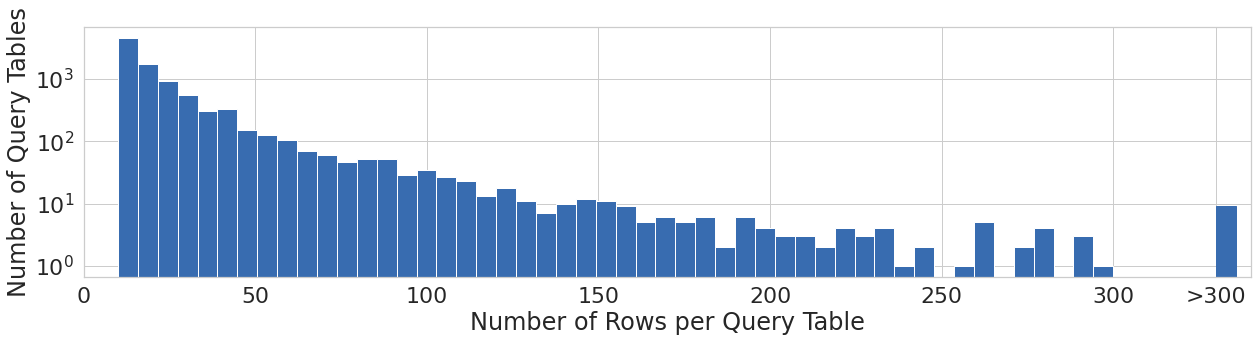

In [145]:
print('Min:', queries_df['num_tuples'].min())
print('Max:', queries_df['num_tuples'].max())

f, axs = plt.subplots(1, 1)
sns.histplot(queries_df[queries_df['num_tuples']<=300]['num_tuples'], bins=50, ax=axs, color='#386cb0', alpha=1)

# Add in the last bar
num_queries_above_threshold = len(queries_df[queries_df['num_tuples']>300])
width=0
for p in axs.patches:
    width=p.get_width()
axs.add_patch(patches.Rectangle((330, 0), width, num_queries_above_threshold, color='#386cb0'))

# Modify the labels
plt.draw()
labels = [w.get_text() for w in axs.get_xticklabels()]
locs=list(axs.get_xticks())
labels+=[">300"]
locs+=[330]
axs.set_xticklabels(labels)
axs.set_xticks(locs)
plt.xlim(0, 340)


plt.yscale('log')
plt.xlabel("Number of Rows per Query Table");plt.ylabel("Number of Query Tables");plt.tight_layout()
plt.savefig('figures/query_distribution/num_rows_per_query.svg')
plt.savefig('figures/query_distribution/num_rows_per_query.pdf')

## Number of Columns per Query Table

/tmp/ipykernel_1483342/1965391034.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(labels)
No handles with labels found to put in legend.


Min: 3.0
Max: 17.0


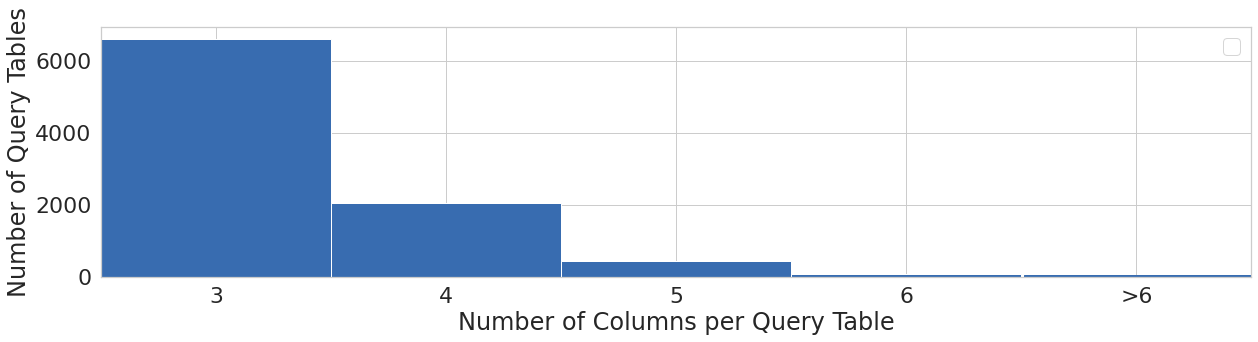

In [144]:
print('Min:', queries_df['tuple_width'].min())
print('Max:', queries_df['tuple_width'].max())

f, axs = plt.subplots(1, 1)
bins = np.arange(2, 6 + 1.5) - 0.5
sns.histplot(queries_df[queries_df['tuple_width']<=6]['tuple_width'], bins=bins, ax=axs, color='#386cb0', alpha=1)


# Add in the last bar
num_queries_above_threshold = len(queries_df[queries_df['tuple_width']>6])
width=0
for p in axs.patches:
    width=p.get_width()
axs.add_patch(patches.Rectangle((6.51, 0), width, num_queries_above_threshold, color='#386cb0'))

# Modify the labels
plt.draw()
labels = [w.get_text() for w in axs.get_xticklabels()]
locs=list(axs.get_xticks())
labels=["3", "4", "5", "6", ">6"]
locs=[3, 4, 5, 6, 7]
axs.set_xticklabels(labels)
axs.set_xticks(locs)
plt.xlim(2.5, 7.5)

plt.xlabel("Number of Columns per Query Table");plt.ylabel("Number of Query Tables");plt.legend();plt.tight_layout()
plt.savefig('figures/query_distribution/num_columns_per_query.svg')
plt.savefig('figures/query_distribution/num_columns_per_query.pdf')

## Number of Relevant Tables per Query Table

Min: 0.0
Max: 535.0


/tmp/ipykernel_1483342/2059048333.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(labels)


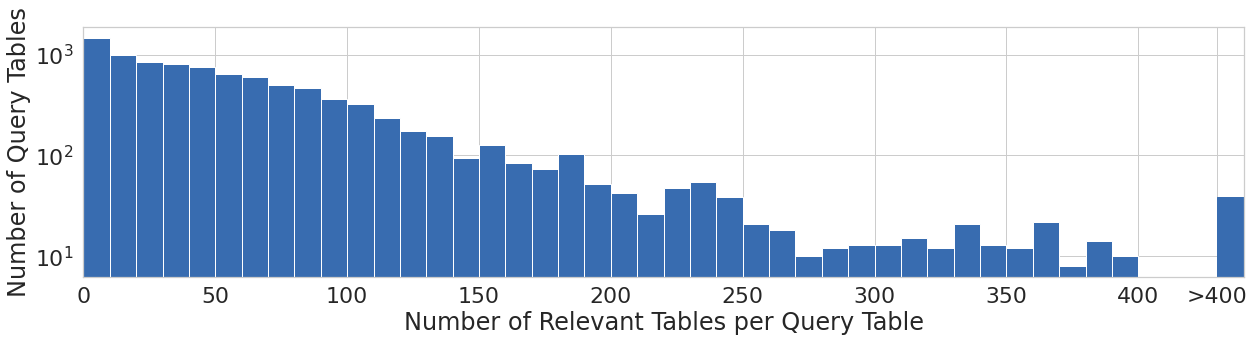

In [143]:
print('Min:', queries_df['categories_relevant_tables'].min())
print('Max:', queries_df['categories_relevant_tables'].max())

f, axs = plt.subplots(1, 1)
sns.histplot(queries_df[queries_df['categories_relevant_tables']<=400]['categories_relevant_tables'], bins=40, ax=axs, color='#386cb0', alpha=1)

# Add in the last bar
num_queries_above_threshold = len(queries_df[queries_df['categories_relevant_tables']>400])
width=0
for p in axs.patches:
    width=p.get_width()
axs.add_patch(patches.Rectangle((430, 0), width, num_queries_above_threshold, color='#386cb0'))

# Modify the labels
plt.draw()
labels = [w.get_text() for w in axs.get_xticklabels()]
locs=list(axs.get_xticks())
labels+=[">400"]
locs+=[430]
axs.set_xticklabels(labels)
axs.set_xticks(locs)
plt.xlim(0, 440)

plt.yscale('log')
plt.xlabel("Number of Relevant Tables per Query Table");plt.ylabel("Number of Query Tables");plt.tight_layout()
plt.savefig('figures/query_distribution/relevant_tables_per_query.svg')
plt.savefig('figures/query_distribution/relevant_tables_per_query.pdf')

No handles with labels found to put in legend.


Min: 0.0
Max: 626.0


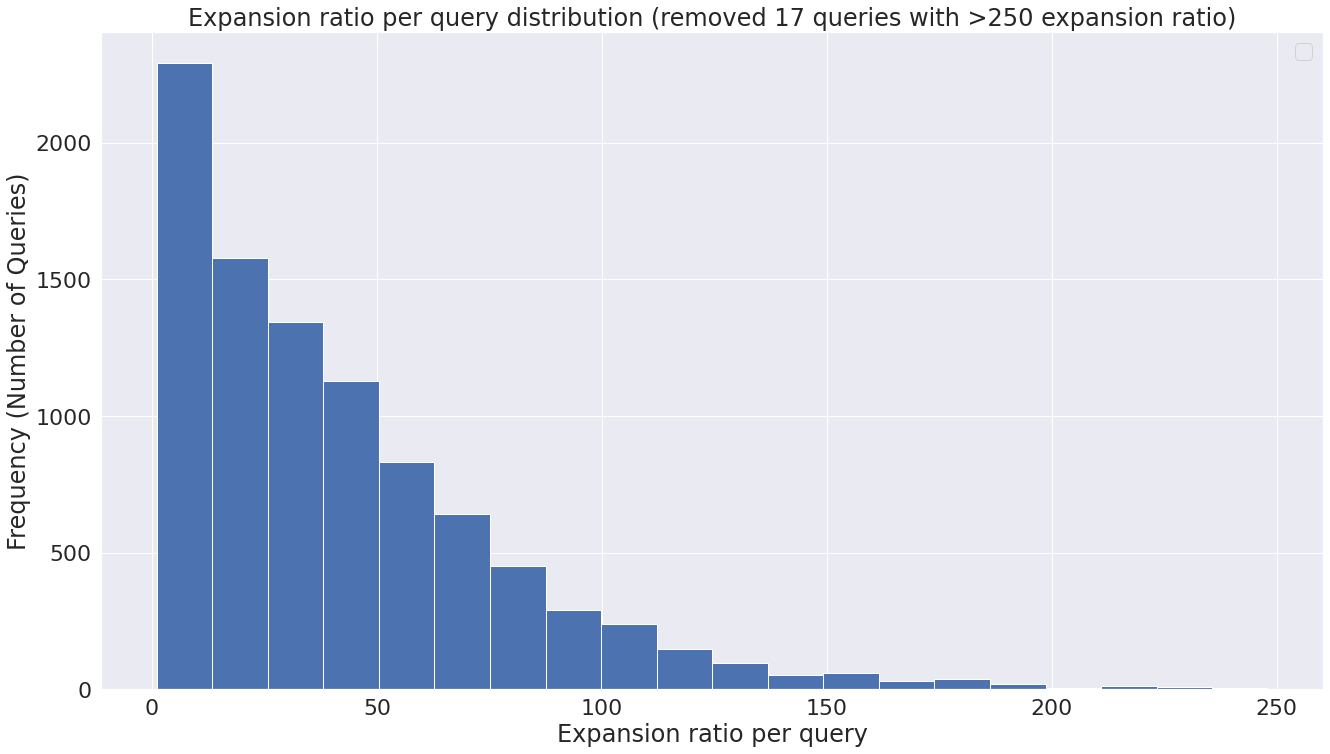

In [10]:
print('Min:', queries_df['categories_expansion_ratio'].min())
print('Max:', queries_df['categories_expansion_ratio'].max())

queries_df_filtered = queries_df[queries_df['categories_expansion_ratio']>1]
queries_df_filtered = queries_df_filtered[queries_df_filtered['categories_expansion_ratio']<250]


ax = plt.hist(queries_df_filtered['categories_expansion_ratio'], bins=20)
plt.xlabel("Expansion ratio per query");plt.ylabel("Frequency (Number of Queries)");plt.title("Expansion ratio per query distribution (removed 17 queries with >250 expansion ratio)");plt.legend();plt.tight_layout()
plt.savefig('figures/query_distribution/expansion_ratio.svg')

In [11]:
tmp = queries_df[queries_df['categories_expansion_ratio']>1]
tmp.sort_values(by='categories_expansion_ratio')

,wikipage,wikipage_id,num_tables,tables,num_entities,tuple_width,num_tuples,selected_table,selected_row_ids,categories_relevant_wikipages,categories_relevant_tables,navigation_links_relevant_wikipages,navigation_links_relevant_tables,categories_expansion_ratio,navigation_links_expansion_ratio,avg_query_containment
156544,https://en.wikipedia.org/wiki/Historical_list_...,156544,27,"[table-1068-290.json, table-1068-291.json, tab...","[69, 112, 114, 110, 117, 115, 115, 116, 115, 1...",3.0,43.0,table-1068-297.json,"[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...",2.0,28.0,NaN,NaN,1.037037,NaN,0.109364
187821,https://en.wikipedia.org/wiki/List_of_2013–14_...,187821,19,"[table-1285-817.json, table-1285-819.json, tab...","[14, 15, 17, 11, 23, 18, 15, 17, 14, 16, 27, 2...",3.0,10.0,table-1285-829.json,"[2, 3, 4, 6, 7, 8, 9, 10, 11, 13]",2.0,20.0,NaN,NaN,1.052632,NaN,0.160088
81668,https://en.wikipedia.org/wiki/List_of_Germany_...,81668,14,"[table-0551-20.json, table-0551-21.json, table...","[21, 57, 34, 61, 38, 48, 79, 59, 55, 31, 29, 4...",4.0,15.0,table-0551-29.json,"[6, 15, 20, 24, 28, 32, 34, 35, 36, 37, 38, 45...",2.0,15.0,NaN,NaN,1.071429,NaN,0.298701
175940,https://en.wikipedia.org/wiki/2012_IRB_Junior_...,175940,12,"[table-1203-906.json, table-1203-907.json, tab...","[18, 27, 16, 25, 27, 16, 15, 25, 27, 15, 23, 11]",3.0,10.0,table-1203-907.json,"[1, 2, 5, 6, 8, 9, 16, 20, 24, 26]",2.0,13.0,NaN,NaN,1.083333,NaN,0.057018
179926,https://en.wikipedia.org/wiki/2013_World_Baseb...,179926,16,"[table-1231-439.json, table-1231-440.json, tab...","[40, 43, 46, 39, 61, 77, 51, 71, 21, 20, 59, 6...",4.0,27.0,table-1231-453.json,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2.0,18.0,NaN,NaN,1.125000,NaN,0.014406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213873,https://en.wikipedia.org/wiki/Champs-Élysées_s...,213873,1,[table-1453-804.json],[91],3.0,29.0,table-1453-804.json,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 16,...",53.0,495.0,NaN,NaN,495.000000,NaN,0.007988
141082,https://en.wikipedia.org/wiki/List_of_Hoarders...,141082,1,[table-0964-447.json],[11],3.0,11.0,table-0964-447.json,"[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]",89.0,593.0,NaN,NaN,593.000000,NaN,0.001536
121504,https://en.wikipedia.org/wiki/List_of_The_Jose...,121504,1,[table-0827-353.json],[28],6.0,29.0,table-0827-353.json,"[1, 3, 13, 15, 17, 21, 29, 35, 39, 41, 45, 47,...",89.0,593.0,NaN,NaN,593.000000,NaN,0.000060
133315,https://en.wikipedia.org/wiki/List_of_Shark_Ta...,133315,1,[table-0909-505.json],[13],5.0,13.0,table-0909-505.json,"[1, 3, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27]",100.0,621.0,NaN,NaN,621.000000,NaN,0.000248


# Populate the expanded_dataset_query_tables directory (copy the query tables)

In [13]:
import shutil

tables_dir = '../../tables/wikipages/wikipages_expanded_dataset/tables/'
query_output_dir = '../../tables/wikipages/expanded_dataset_query_tables/'

for idx, row in tqdm(queries_df.iterrows(), total=queries_df.shape[0]):
    query_table = row['selected_table']
    shutil.copy(tables_dir+query_table, query_output_dir+query_table)

100%|██████████| 9771/9771 [01:09<00:00, 140.45it/s]


# All queries (Variable tuples per query)

In [6]:
queries_df

,wikipage,wikipage_id,num_tables,tables,num_entities,tuple_width,num_tuples,selected_table,selected_row_ids,categories_relevant_wikipages,categories_relevant_tables,navigation_links_relevant_wikipages,navigation_links_relevant_tables,categories_expansion_ratio,navigation_links_expansion_ratio,avg_query_containment
32,https://en.wikipedia.org/wiki/Andre_Norton_Award,32,1,[table-0001-242.json],[80],4.0,11.0,table-0001-242.json,"[4, 6, 7, 10, 13, 14, 28, 30, 31, 33, 36]",51.0,58.0,NaN,NaN,58.0,NaN,0.036120
46,https://en.wikipedia.org/wiki/President_of_Ind...,46,1,[table-0001-319.json],[20],3.0,10.0,table-0001-319.json,"[0, 3, 4, 5, 6, 7, 8, 12, 14, 18]",7.0,7.0,NaN,NaN,7.0,NaN,0.271930
66,https://en.wikipedia.org/wiki/Charlotte_Bobcat...,66,1,[table-0001-460.json],[108],3.0,28.0,table-0001-460.json,"[0, 8, 9, 15, 19, 21, 26, 28, 31, 34, 38, 39, ...",27.0,122.0,NaN,NaN,122.0,NaN,0.026968
68,https://en.wikipedia.org/wiki/List_of_organism...,68,1,[table-0001-469.json],[355],3.0,14.0,table-0001-469.json,"[2, 44, 45, 53, 80, 107, 206, 208, 213, 219, 2...",16.0,37.0,NaN,NaN,37.0,NaN,0.002137
97,https://en.wikipedia.org/wiki/1982_NCAA_Women'...,97,2,"[table-0001-64.json, table-0001-65.json]","[12, 58]",4.0,13.0,table-0001-65.json,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15]",34.0,39.0,NaN,NaN,19.5,NaN,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244164,https://en.wikipedia.org/wiki/2004_LPGA_Tour,244164,2,"[table-1653-355.json, table-1653-356.json]","[64, 15]",3.0,10.0,table-1653-355.json,"[4, 6, 7, 8, 10, 16, 17, 24, 26, 30]",68.0,81.0,NaN,NaN,40.5,NaN,0.237500
244174,https://en.wikipedia.org/wiki/1998_NCAA_Women'...,244174,1,[table-1653-409.json],[56],4.0,11.0,table-1653-409.json,"[0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 15]",40.0,48.0,NaN,NaN,48.0,NaN,0.206687
244209,https://en.wikipedia.org/wiki/1931_Italian_Gra...,244209,1,[table-1653-615.json],[26],3.0,13.0,table-1653-615.json,"[0, 1, 2, 3, 4, 11, 15, 19, 21, 22, 23, 24, 27]",88.0,129.0,NaN,NaN,129.0,NaN,0.075247
244229,https://en.wikipedia.org/wiki/List_of_World_Aq...,244229,16,"[table-1653-718.json, table-1653-720.json, tab...","[30, 44, 45, 40, 40, 44, 41, 24, 21, 47, 25, 4...",4.0,15.0,table-1653-730.json,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",44.0,240.0,NaN,NaN,15.0,NaN,0.131381


In [8]:
queries_df_1_tuple = pd.read_pickle('query_dataframes/expanded_wikipages/all_queries/minTupleWidth_2_tuplesPerQuery_1.pickle')
queries_df_1_tuple

,wikipage,wikipage_id,num_tables,tables,num_entities,tuple_width,num_tuples,selected_table,selected_row_ids,categories_relevant_wikipages,categories_relevant_tables,navigation_links_relevant_wikipages,navigation_links_relevant_tables,categories_expansion_ratio,navigation_links_expansion_ratio,avg_query_containment
32,https://en.wikipedia.org/wiki/Andre_Norton_Award,32,1,[table-0001-242.json],[80],4.0,1.0,table-0001-242.json,[4],51.0,58.0,NaN,NaN,58.0,NaN,0.036120
46,https://en.wikipedia.org/wiki/President_of_Ind...,46,1,[table-0001-319.json],[20],3.0,1.0,table-0001-319.json,[0],7.0,7.0,NaN,NaN,7.0,NaN,0.271930
66,https://en.wikipedia.org/wiki/Charlotte_Bobcat...,66,1,[table-0001-460.json],[108],3.0,1.0,table-0001-460.json,[0],27.0,122.0,NaN,NaN,122.0,NaN,0.026968
68,https://en.wikipedia.org/wiki/List_of_organism...,68,1,[table-0001-469.json],[355],3.0,1.0,table-0001-469.json,[2],16.0,37.0,NaN,NaN,37.0,NaN,0.002137
97,https://en.wikipedia.org/wiki/1982_NCAA_Women'...,97,2,"[table-0001-64.json, table-0001-65.json]","[12, 58]",4.0,1.0,table-0001-65.json,[0],34.0,39.0,NaN,NaN,19.5,NaN,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244164,https://en.wikipedia.org/wiki/2004_LPGA_Tour,244164,2,"[table-1653-355.json, table-1653-356.json]","[64, 15]",3.0,1.0,table-1653-355.json,[4],68.0,81.0,NaN,NaN,40.5,NaN,0.237500
244174,https://en.wikipedia.org/wiki/1998_NCAA_Women'...,244174,1,[table-1653-409.json],[56],4.0,1.0,table-1653-409.json,[0],40.0,48.0,NaN,NaN,48.0,NaN,0.206687
244209,https://en.wikipedia.org/wiki/1931_Italian_Gra...,244209,1,[table-1653-615.json],[26],3.0,1.0,table-1653-615.json,[0],88.0,129.0,NaN,NaN,129.0,NaN,0.075247
244229,https://en.wikipedia.org/wiki/List_of_World_Aq...,244229,16,"[table-1653-718.json, table-1653-720.json, tab...","[30, 44, 45, 40, 40, 44, 41, 24, 21, 47, 25, 4...",4.0,1.0,table-1653-730.json,[0],44.0,240.0,NaN,NaN,15.0,NaN,0.131381


In [9]:
queries_df_2_tuple = pd.read_pickle('query_dataframes/expanded_wikipages/all_queries/minTupleWidth_2_tuplesPerQuery_2.pickle')
queries_df_2_tuple

,wikipage,wikipage_id,num_tables,tables,num_entities,tuple_width,num_tuples,selected_table,selected_row_ids,categories_relevant_wikipages,categories_relevant_tables,navigation_links_relevant_wikipages,navigation_links_relevant_tables,categories_expansion_ratio,navigation_links_expansion_ratio,avg_query_containment
32,https://en.wikipedia.org/wiki/Andre_Norton_Award,32,1,[table-0001-242.json],[80],4.0,2.0,table-0001-242.json,"[4, 6]",51.0,58.0,NaN,NaN,58.0,NaN,0.036120
46,https://en.wikipedia.org/wiki/President_of_Ind...,46,1,[table-0001-319.json],[20],3.0,2.0,table-0001-319.json,"[0, 3]",7.0,7.0,NaN,NaN,7.0,NaN,0.271930
66,https://en.wikipedia.org/wiki/Charlotte_Bobcat...,66,1,[table-0001-460.json],[108],3.0,2.0,table-0001-460.json,"[0, 8]",27.0,122.0,NaN,NaN,122.0,NaN,0.026968
68,https://en.wikipedia.org/wiki/List_of_organism...,68,1,[table-0001-469.json],[355],3.0,2.0,table-0001-469.json,"[2, 44]",16.0,37.0,NaN,NaN,37.0,NaN,0.002137
97,https://en.wikipedia.org/wiki/1982_NCAA_Women'...,97,2,"[table-0001-64.json, table-0001-65.json]","[12, 58]",4.0,2.0,table-0001-65.json,"[0, 1]",34.0,39.0,NaN,NaN,19.5,NaN,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244164,https://en.wikipedia.org/wiki/2004_LPGA_Tour,244164,2,"[table-1653-355.json, table-1653-356.json]","[64, 15]",3.0,2.0,table-1653-355.json,"[4, 6]",68.0,81.0,NaN,NaN,40.5,NaN,0.237500
244174,https://en.wikipedia.org/wiki/1998_NCAA_Women'...,244174,1,[table-1653-409.json],[56],4.0,2.0,table-1653-409.json,"[0, 1]",40.0,48.0,NaN,NaN,48.0,NaN,0.206687
244209,https://en.wikipedia.org/wiki/1931_Italian_Gra...,244209,1,[table-1653-615.json],[26],3.0,2.0,table-1653-615.json,"[0, 1]",88.0,129.0,NaN,NaN,129.0,NaN,0.075247
244229,https://en.wikipedia.org/wiki/List_of_World_Aq...,244229,16,"[table-1653-718.json, table-1653-720.json, tab...","[30, 44, 45, 40, 40, 44, 41, 24, 21, 47, 25, 4...",4.0,2.0,table-1653-730.json,"[0, 1]",44.0,240.0,NaN,NaN,15.0,NaN,0.131381


In [10]:
queries_df_10_tuple = pd.read_pickle('query_dataframes/expanded_wikipages/all_queries/minTupleWidth_2_tuplesPerQuery_10.pickle')
queries_df_10_tuple

,wikipage,wikipage_id,num_tables,tables,num_entities,tuple_width,num_tuples,selected_table,selected_row_ids,categories_relevant_wikipages,categories_relevant_tables,navigation_links_relevant_wikipages,navigation_links_relevant_tables,categories_expansion_ratio,navigation_links_expansion_ratio,avg_query_containment
32,https://en.wikipedia.org/wiki/Andre_Norton_Award,32,1,[table-0001-242.json],[80],4.0,10.0,table-0001-242.json,"[4, 6, 7, 10, 13, 14, 28, 30, 31, 33]",51.0,58.0,NaN,NaN,58.0,NaN,0.036120
46,https://en.wikipedia.org/wiki/President_of_Ind...,46,1,[table-0001-319.json],[20],3.0,10.0,table-0001-319.json,"[0, 3, 4, 5, 6, 7, 8, 12, 14, 18]",7.0,7.0,NaN,NaN,7.0,NaN,0.271930
66,https://en.wikipedia.org/wiki/Charlotte_Bobcat...,66,1,[table-0001-460.json],[108],3.0,10.0,table-0001-460.json,"[0, 8, 9, 15, 19, 21, 26, 28, 31, 34]",27.0,122.0,NaN,NaN,122.0,NaN,0.026968
68,https://en.wikipedia.org/wiki/List_of_organism...,68,1,[table-0001-469.json],[355],3.0,10.0,table-0001-469.json,"[2, 44, 45, 53, 80, 107, 206, 208, 213, 219]",16.0,37.0,NaN,NaN,37.0,NaN,0.002137
97,https://en.wikipedia.org/wiki/1982_NCAA_Women'...,97,2,"[table-0001-64.json, table-0001-65.json]","[12, 58]",4.0,10.0,table-0001-65.json,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 10]",34.0,39.0,NaN,NaN,19.5,NaN,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244164,https://en.wikipedia.org/wiki/2004_LPGA_Tour,244164,2,"[table-1653-355.json, table-1653-356.json]","[64, 15]",3.0,10.0,table-1653-355.json,"[4, 6, 7, 8, 10, 16, 17, 24, 26, 30]",68.0,81.0,NaN,NaN,40.5,NaN,0.237500
244174,https://en.wikipedia.org/wiki/1998_NCAA_Women'...,244174,1,[table-1653-409.json],[56],4.0,10.0,table-1653-409.json,"[0, 1, 2, 3, 4, 7, 8, 9, 10, 11]",40.0,48.0,NaN,NaN,48.0,NaN,0.206687
244209,https://en.wikipedia.org/wiki/1931_Italian_Gra...,244209,1,[table-1653-615.json],[26],3.0,10.0,table-1653-615.json,"[0, 1, 2, 3, 4, 11, 15, 19, 21, 22]",88.0,129.0,NaN,NaN,129.0,NaN,0.075247
244229,https://en.wikipedia.org/wiki/List_of_World_Aq...,244229,16,"[table-1653-718.json, table-1653-720.json, tab...","[30, 44, 45, 40, 40, 44, 41, 24, 21, 47, 25, 4...",4.0,10.0,table-1653-730.json,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",44.0,240.0,NaN,NaN,15.0,NaN,0.131381
